In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np

from trout.files.reference_log_file import ReferenceLogFile
from typing import *

In [2]:
def plot_field():
    f = ReferenceLogFile("ref_revised_71.txt")
    star_end = len(f.data()) + 1
    array_for_x_values = np.array([]) 
    array_for_y_values = np.array([]) 
    for star in range(1,star_end):
        xy= f.get_star_xy(star)
        array_for_x_values = np.append(array_for_x_values, [xy[0]])
        array_for_y_values = np.append(array_for_y_values, [xy[1]])
    plt.scatter(array_for_x_values, array_for_y_values, s = [100/(0.1*i) for i in range(1,star_end)])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [3]:
def get_neighbors(star, radius):
    g = ReferenceLogFile("ref_revised_71.txt")
    
    star_xy = g.get_star_xy(star)
    x,y = star_xy[0], star_xy[1]
    others = []
    neighbors = []
    
    for neighbor in range(1, len(g.data()+1)):
        
        neighbor_xy= g.get_star_xy(neighbor)
        n_x, n_y = neighbor_xy[0], neighbor_xy[1]
        
        distance_between_stars = (((n_x-x)**2)+((n_y-y)**2))**(1/2)
        
        if distance_between_stars < (2 * radius) and distance_between_stars != 0:
            neighbors.append(neighbor)
        elif distance_between_stars != 0:
            others.append(neighbor)
    
    return neighbors

In [7]:
def plot_with_neighbors(star, radius=4):
    neighbors = get_neighbors(star, radius)
    
    f = ReferenceLogFile("ref_revised_71.txt")
    xy= f.get_star_xy(star)
    
    
    others = list(range(1, len(f.data())+1))
    
    if neighbors:
        for i in neighbors:
            others.remove(i)
        
    x,y = xy[0], xy[1]
    
    array_for_x_values = np.array([x]) 
    array_for_y_values = np.array([y])
    
    plt.scatter(array_for_x_values, array_for_y_values, s = [500], color = 'green')
    array_for_x_values, array_for_y_values = np.array([]), np.array([])
    
    for neighbor in neighbors:
        
        n_xy= f.get_star_xy(neighbor)
        array_for_x_values = np.append(array_for_x_values, [n_xy[0]])
        array_for_y_values = np.append(array_for_y_values, [n_xy[1]])
    
    plt.scatter(array_for_x_values, array_for_y_values, s = [500 for i in neighbors], color = 'blue')
    array_for_x_values, array_for_y_values = np.array([]), np.array([])
    
    for other in others:
        
        o_xy= f.get_star_xy(other)
        array_for_x_values = np.append(array_for_x_values, [o_xy[0]])
        array_for_y_values = np.append(array_for_y_values, [o_xy[1]])
        
    plt.scatter(array_for_x_values, array_for_y_values, s = [0.1 for i in others], color = 'red')
    
    plt.show()i

In [35]:
StarNoType = int
DistanceType = float
CloseNeighborInformation = Tuple[StarNoType, DistanceType]

def get_closest_neighbors(star,
                          number=5, 
                          sort_fn=lambda x : x[1],
                          filter_fn=lambda x : x
                         ) -> List[CloseNeighborInformation]:
    """
    Returns the list of `number` closest neighbors for 
    given star.
    
    param star: star number
    param number: maximum number of neighbors to return
    param sort_fn (optional): 
        Function used to sort the result
        Defaults to distance
    param filter_fn (optional): Default identity
    
    returns: Ordered list of neighbors and the 
            distance between their centers
    """
    f = ReferenceLogFile("ref_revised_71.txt")

    star_xy = f.get_star_xy(star)
    x,y = star_xy[0], star_xy[1]
    neighbors = []
    
    for neighbor in range(1, len(f.data()+1)):
        
        neighbor_xy= f.get_star_xy(neighbor)
        n_x, n_y = neighbor_xy[0], neighbor_xy[1]
        
        distance = (((n_x-x)**2)+((n_y-y)**2))**(1/2)
        
        # Ignore itself
        if neighbor != star:
            neighbors.append((neighbor, distance))
    
    return sorted(filter(filter_fn, neighbors), key=sort_fn)[:number]

In [47]:
get_neighbors_new = lambda s, r : get_closest_neighbors(s, filter_fn=lambda x : x[1] <= r)

In [55]:
get_neighbors_new(1, 20)

[(1919, 16.573487864658972),
 (2251, 16.587311415657407),
 (2268, 16.590204941470688),
 (954, 18.6893151292389)]

In [40]:
get_closest_neighbors(102, filter_fn=lambda x : x[1] < 5)

[]

In [49]:
get_neighbors(1, 10)

[954, 1919, 2251, 2268]

In [6]:
f = ReferenceLogFile("ref_revised_71.txt")

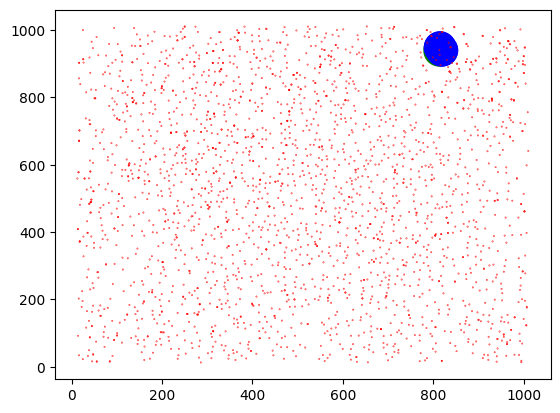

In [102]:
plot_with_neighbors(2505,4)

In [7]:
#plot_field()
x = 0
z = len(f.data())+1

for i in range(1,z):
    y = get_neighbors(i, 4)
    if len(y) == 0: x= x+1
    print(i,y)
print(f"{(x/z)*100} dont have any neighbors")



1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 [168]
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 [38]
38 [37]
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 [2488]
50 []
51 []
52 []
53 []
54 []
55 []
56 []
57 []
58 []
59 []
60 []
61 []
62 []
63 []
64 []
65 []
66 []
67 []
68 []
69 []
70 []
71 []
72 [195]
73 []
74 []
75 []
76 []
77 []
78 []
79 []
80 []
81 []
82 []
83 []
84 []
85 []
86 []
87 []
88 []
89 []
90 [280, 299, 2499]
91 []
92 []
93 []
94 []
95 []
96 []
97 []
98 []
99 []
100 []
101 []
102 [2475]
103 []
104 []
105 []
106 []
107 []
108 []
109 []
110 []
111 []
112 []
113 []
114 []
115 []
116 []
117 []
118 []
119 []
120 []
121 []
122 []
123 []
124 []
125 []
126 []
127 []
128 [466]
129 []
130 []
131 []
132 []
133 []
134 []
135 []
136 []
137 []
138 []
139 []
140 []
141 []
142 []
143 []
144 []
145 []
146 []
147 []
148 []
149 [151]
150 []
151 [149]
152 []
153

KeyboardInterrupt: 

In [ ]:
"jhj"

In [58]:
x=0
z = [356,294,1,357,255,366,197,310]
for i in z:
    
    y = get_neighbors(i, 4)
    if len(y) == 0: x= x+1
    print(i,y)
    
print(f"{(x/len(z))*100} dont have any neighbors")


356 []
294 []
1 []
357 [879]
255 [1539]
366 []
197 []
310 []
75.0 dont have any neighbors


In [59]:
x=0
z = [115,317,58,7,338,282,43,378,62,125]
for i in z:
    
    y = get_neighbors(i, 4)
    if len(y) == 0: x= x+1
    print(i,y)
    
print(f"{(x/len(z))*100} dont have any neighbors")

115 []
317 [1439]
58 []
7 []
338 []
282 []
43 []
378 []
62 []
125 []
90.0 dont have any neighbors


In [9]:
x=0
z = [247, 375, 68, 267, 98, 172, 77, 117, 211, 44]
for i in z:
    
    y = get_neighbors(i, 4)
    if len(y) == 0: x= x+1
    print(i,y)
    
print(f"{(x/len(z))*100} dont have any neighbors")

247 []
375 []
68 []
267 []
98 []
172 []
77 []
117 []
211 []
44 []
100.0 dont have any neighbors


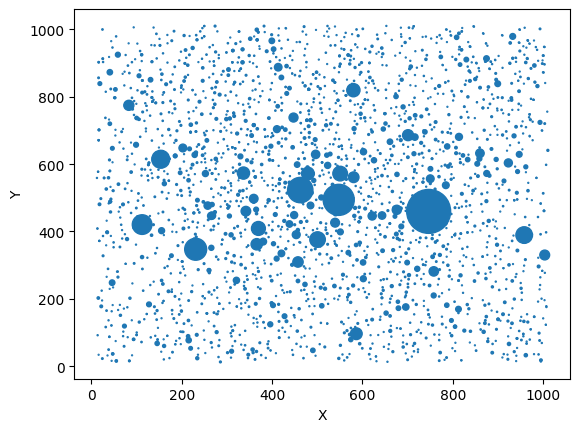

In [12]:
plot_field()